### 피마 인디언 당뇨병 예측 평가

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pregnant : 과거 임신 횟수

plasma : 포도당 부하 검사 2시간 후 공복혈당 농도(mm Hg)

pressure : 확장기 혈압(mm Hg)

skin : 삼두근 피부 주름 두께(mm)

insulin : 혈청 인슐린(2-hour, mu U/ml)

bmi : 체질량 지수(BMI)

predigree : 당뇨병 가족력(pedigree)

In [2]:
df = pd.read_csv('../data/pima-indians-diabetes.csv', skiprows=9, header=None)
df.columns = ['pregnant', 'plasma', 'pressure', 'skin', 'insulin', 'bmi', 'predigree', 'age', 'target']

In [3]:
# 1 이 당뇨병
df.target.value_counts()

target
0    500
1    268
Name: count, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   plasma     768 non-null    int64  
 2   pressure   768 non-null    int64  
 3   skin       768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   bmi        768 non-null    float64
 6   predigree  768 non-null    float64
 7   age        768 non-null    int64  
 8   target     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,pregnant,plasma,pressure,skin,insulin,bmi,predigree,age,target
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
# 각 변수별 상관도
df.corr()

,pregnant,plasma,pressure,skin,insulin,bmi,predigree,age,target
pregnant,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plasma,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
pressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
predigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
target,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


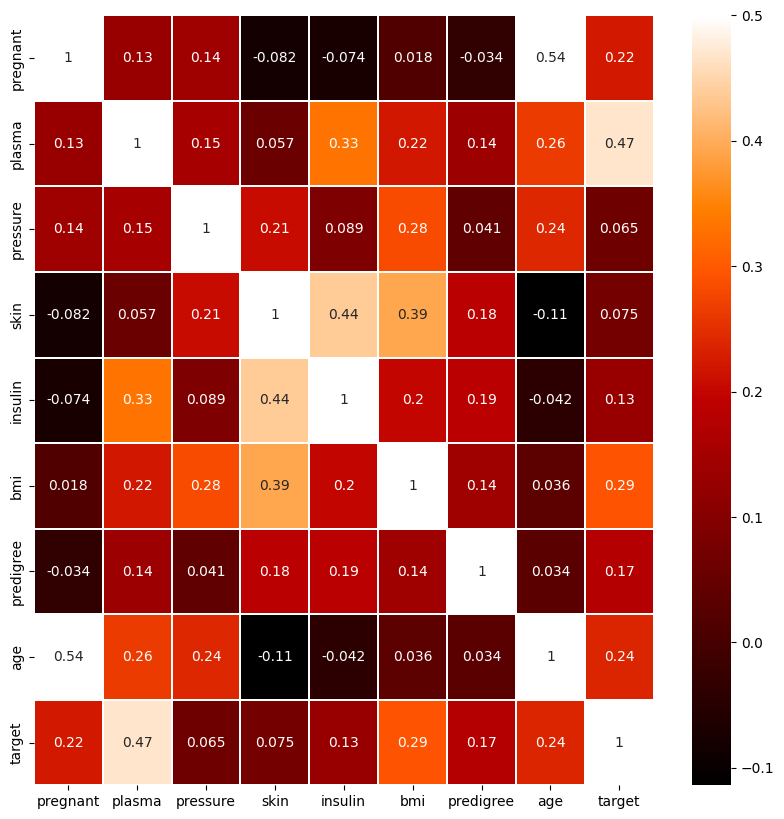

In [9]:
# 상관도 그래프 그리기
colormap = plt.cm.gist_heat
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), lw=0.1, vmax=0.5, cmap=colormap, linecolor='white', annot=True)
plt.show()


In [ ]:
# 숫자가 높을수록, 색깔이 더 밝을수록 더 높은 두 변수간의 상관관계가 높다고  볼 수 있다.
# target과 상관관계가 가장 높은 변수는 plasma(0.47)-(포도당 부하 검사) 과 bmi(0.29) 이다.

- 특정 변수와 종속변수와의 관계 시각화

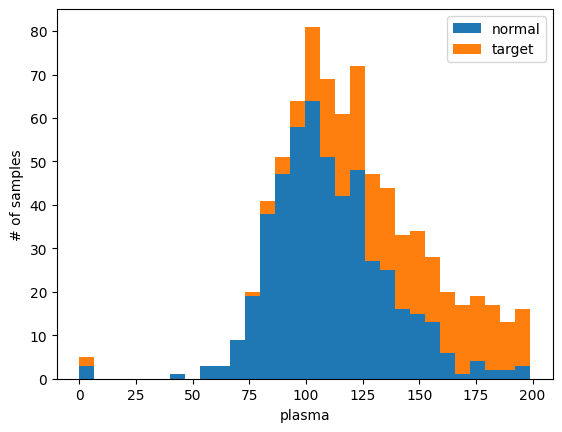

In [11]:
# 포도당 부하 검사 2시간 후 공복혈당 농도가 높을수록 당뇨병과 관계가 깊다.
plt.hist(x=[df.plasma[df.target==0], df.plasma[df.target==1]], bins=30, histtype='barstacked', label=['normal', 'target'])
plt.xlabel('plasma')
plt.ylabel('# of samples')
plt.legend()
plt.show()

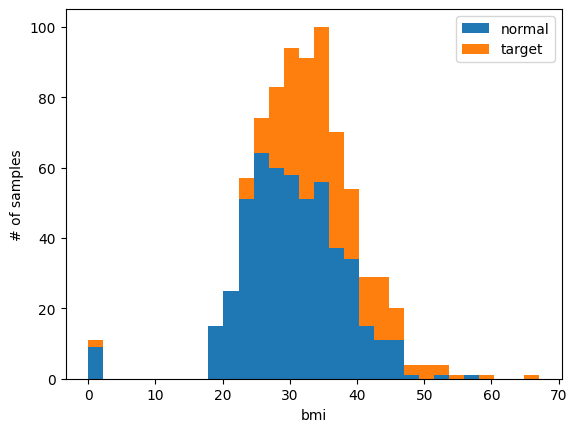

In [12]:
# bmi 가 클수록 당뇨병과 관계가 높다.
plt.hist(x=[df.bmi[df.target==0], df.bmi[df.target==1]], bins=30, histtype='barstacked', label=['normal', 'target'])
plt.xlabel('bmi')
plt.ylabel('# of samples')
plt.legend()
plt.show()

In [13]:
df.head()

,pregnant,plasma,pressure,skin,insulin,bmi,predigree,age,target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [19]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [20]:
from sklearn.model_selection import train_test_split

# 표준화된 데이터로 train/test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(
    X_std, y, stratify=y, random_state=2023, test_size=0.2
)

In [22]:
# 엉터리 데이터
from sklearn.base import BaseEstimator

class MyClassifier(BaseEstimator):
    def fit(self, X, y):
        pass
    def predict(self, X):
        pred = np.zeros(X.shape[0], int)
        for i in range(X.shape[0]):
            if X[i, 1] > 100 or X[i, 5] > 25: 
                pred[i] = 1
        return pred

In [23]:
my_clf = MyClassifier()
my_clf.fit(X_train, y_train)
pred_my = my_clf.predict(X_test)

In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred_my)

0.6493506493506493

- 학습 종류별

In [26]:
from sklearn.tree import DecisionTreeClassifier

# 1. 결정트리로 학습
dtc = DecisionTreeClassifier(random_state=2023)
dtc.fit(X_train, y_train)
dtc.score(X_test, y_test)

0.7402597402597403

In [25]:
from sklearn.ensemble import RandomForestClassifier
# 2. Random Forest로 학습
rfc = RandomForestClassifier(random_state=2023)
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

0.7532467532467533

In [38]:
from sklearn.svm import SVC
# 3. Support Vector로 학습
svc = SVC(random_state=2023)
svc.fit(X_train, y_train)
svc.score(X_test, y_test)


0.7727272727272727

In [39]:
from sklearn.linear_model import LogisticRegression
# 4. Logistic Regression로 학습
lr = LogisticRegression(random_state=2023)
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.7987012987012987

- 학습 종류별로 최적의 방법 찾기

In [31]:
# 1. 결정트리 GridSearchCV
from sklearn.model_selection import GridSearchCV
params = { 'max_depth': [5, 6, 7], 'min_samples_split':[2, 3, 4]}
grid_dt = GridSearchCV(dtc, params, scoring='accuracy', cv=5)
grid_dt.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=2023),
             param_grid={'max_depth': [5, 6, 7],
                         'min_samples_split': [2, 3, 4]},
             scoring='accuracy')

In [33]:
grid_dt.best_params_, grid_dt.best_score_

({'max_depth': 6, 'min_samples_split': 3}, 0.7475543116086899)

In [ ]:
grid_dt.best_estimator_.fit(X_train, y_train)


In [36]:
# 2. Random Forest GridSearchCV
params = { 'max_depth': [5, 6, 7], 'min_samples_split':[2, 3, 4]}
grid_rfc = GridSearchCV(rfc, params, scoring='accuracy', cv=5)
grid_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=2023),
             param_grid={'max_depth': [5, 6, 7],
                         'min_samples_split': [2, 3, 4]},
             scoring='accuracy')

In [37]:
grid_dt.best_params_, grid_dt.best_score_

({'max_depth': 6, 'min_samples_split': 3}, 0.7475543116086899)

In [44]:
# 3. Support Vector로 GridSearchCV
# 정수가 아닌 실수?
# C 파라미터가 기본:1, 클수록 하드마진, 작을수록(0.9, 0.1, 등등이 실수) 소프트마진
params = { 'max_depth': [2, 5, 8], 'min_samples_split':[2, 3, 4]}
grid_svc = GridSearchCV(svc, params=params, scoring='accuracy', cv=5)
# grid_svc.fit(X_train, y_train)

TypeError: GridSearchCV.__init__() got an unexpected keyword argument 'params'

In [ ]:
grid_svc.best_params_, grid_svc.best_score_

In [45]:
# 4. Logistic Regression로 GridSearchCV
params = { 'max_depth': [2, 5, 8], 'min_samples_split':[2, 3, 4]}
grid_lr = GridSearchCV(lr, params, scoring='accuracy', cv=5)
grid_lr.fit(X_train, y_train)

ValueError: Invalid parameter 'max_depth' for estimator LogisticRegression(random_state=2023). Valid parameters are: ['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'].

- 평가

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score

print(confusion_matrix(y_test, ))